## Импорт библиотек

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Загрузка датасета

In [5]:
train = pd.read_csv('../data/external/heart_cleveland_upload.csv')
train.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


Заменим данные категориальных переменных на понятные человеку.

In [13]:
train['sex'] = train['sex'].map({0: 'female', 
                                 1: 'male'})
train['cp'] = train['cp'].map({0: 'typical_angina',
                               1: 'atypical_angina',
                               2: 'non_anginal_pain',
                               3: 'asymptomatic'})
train['fbs'] = train['fbs'].map({0: 'less_than_120mg/ml',
                                 1: 'greater_than_120mg/ml'})
train['restecg'] = train['restecg'].map({0: 'normal',
                                         1: 'ST-T_wave_abnormality', 
                                         2: 'left_ventricular_hypertrophy'})
train['exang'] = train['exang'].map({0: 'no', 
                                     1: 'yes'})
train['slope'] = train['slope'].map({0: 'upsloping', 
                                     1: 'flat',
                                     2: 'downsloping'})
train['thal'] = train['thal'].map({0: 'normal',
                                   1: 'fixed_defect',
                                   2: 'reversable_defect'})
train['condition'] = train['condition'].map({0: 'no_disease',
                                             1: 'has_disease'})

In [15]:
categorical_columns = [i for i in train.loc[:, train.nunique() <= 10]]
numeric_columns = [i for i in train.loc[:, train.nunique() > 10]]
print("Категориальные признаки:", categorical_columns)
print("Числовые признаки:", numeric_columns)

Категориальные признаки: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'condition']
Числовые признаки: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


## Категориальные данные

In [17]:
def ctg_dist(df, cols, hue,rows, columns):    
    fig, axes = plt.subplots(rows, columns, figsize=(16, 12))
    axes = axes.flatten()

    for i, j in zip(df[cols].columns, axes):
        sns.countplot(x=i,
                    data=df,
                    ax=j,
                    order=df[i].value_counts().index)
        j.tick_params(labelrotation=10)
        j.set_title(f'{str(i).capitalize()} distribution')
        plt.tight_layout()
        total = float(len(df[i]))        
        for p in j.patches:
            height = p.get_height()
            j.text(p.get_x() + p.get_width() / 2.,
                    height + 2,
                    '{:1.2f}%'.format((height / total) * 100),
                    ha='center')

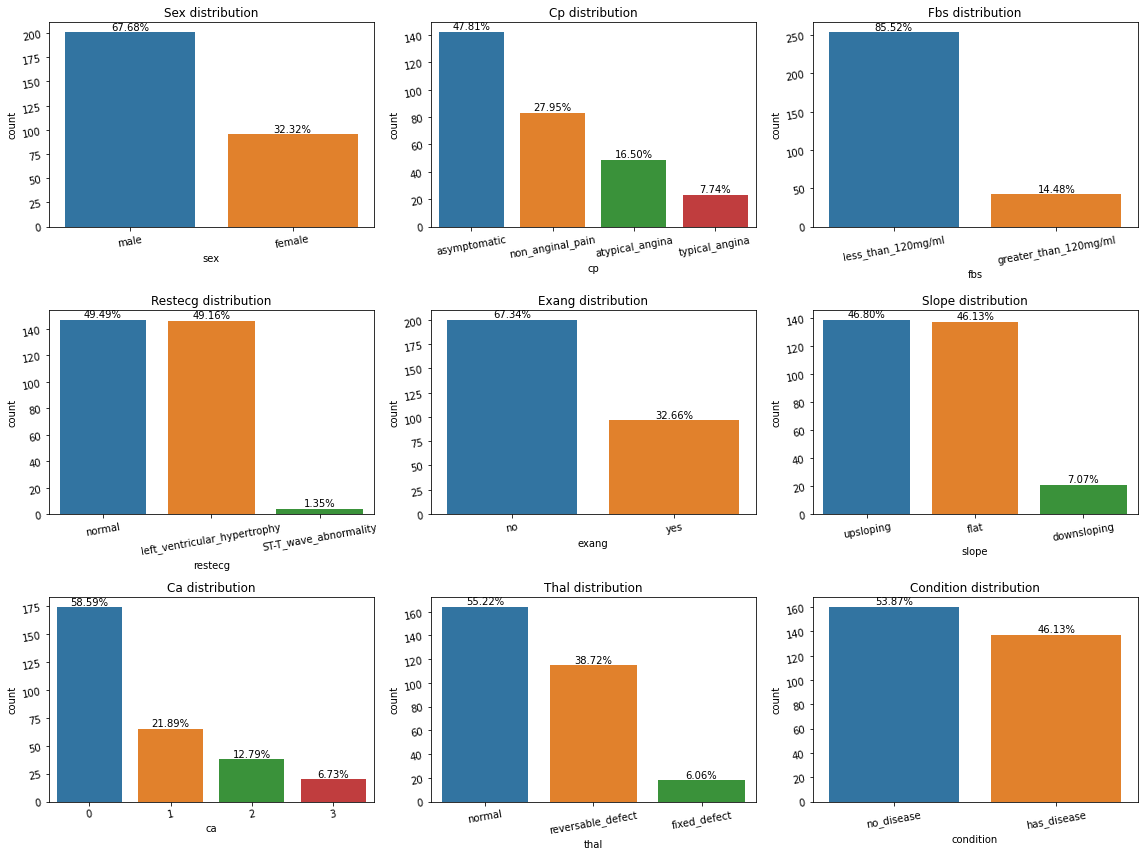

In [19]:
ctg_dist(train, categorical_columns, hue=None, rows=3, columns=3)

### Численные признаки

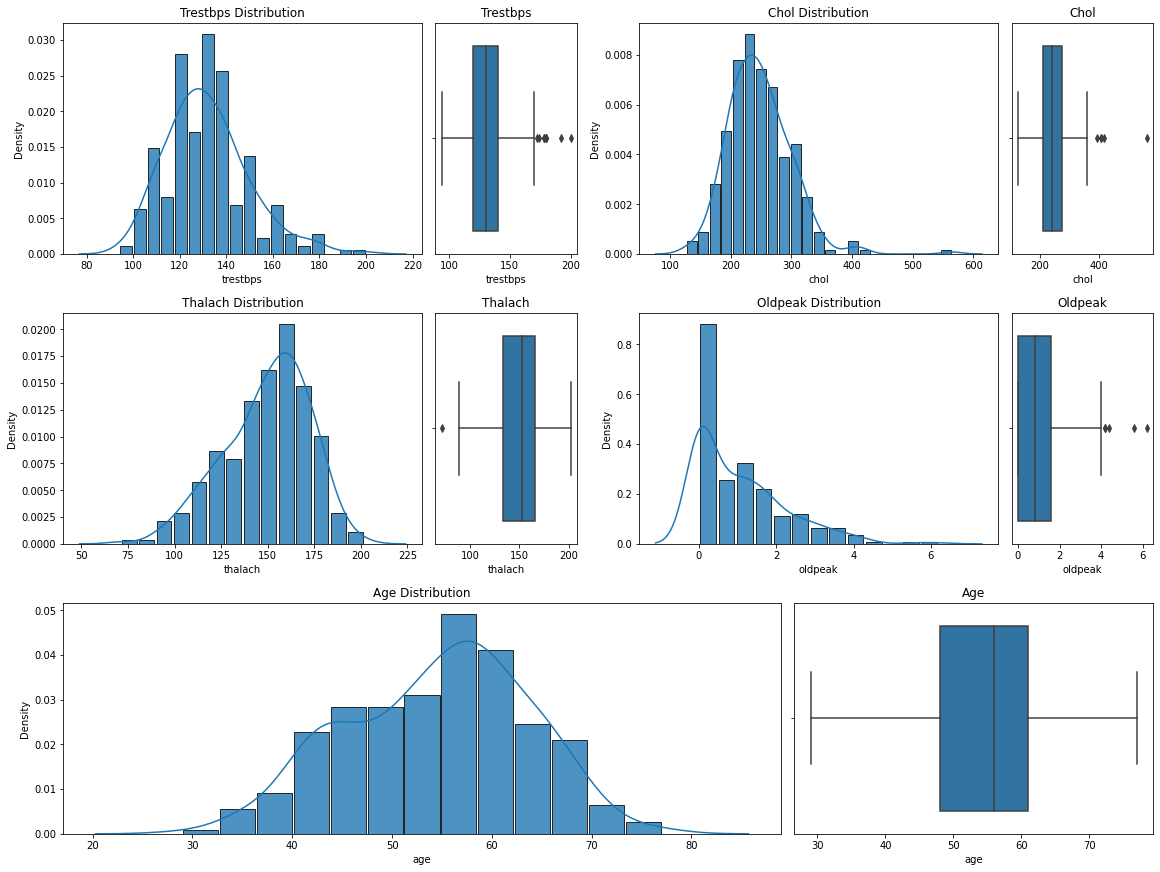

In [23]:
fig = plt.figure(constrained_layout=True, figsize=(16, 12))
grid = gridspec.GridSpec(ncols=6, nrows=3, figure=fig)
ax1 = fig.add_subplot(grid[0, :2])
ax1.set_title('Trestbps Distribution')
sns.distplot(train[numeric_columns[1]],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8})
ax15 = fig.add_subplot(grid[0, 2:3])
ax15.set_title('Trestbps')
sns.boxplot(train[numeric_columns[1]], orient='v')
ax2 = fig.add_subplot(grid[0, 3:5])
ax2.set_title('Chol Distribution')
sns.distplot(train[numeric_columns[2]],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8})
ax25 = fig.add_subplot(grid[0, 5:])
ax25.set_title('Chol')
sns.boxplot(train[numeric_columns[2]], orient='v')
ax3 = fig.add_subplot(grid[1, :2])
ax3.set_title('Thalach Distribution')
sns.distplot(train[numeric_columns[3]],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8})

ax35 = fig.add_subplot(grid[1, 2])
ax35.set_title('Thalach')
sns.boxplot(train[numeric_columns[3]], orient='v')
ax4 = fig.add_subplot(grid[1, 3:5])
ax4.set_title('Oldpeak Distribution')
sns.distplot(train[numeric_columns[4]],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8})
ax45 = fig.add_subplot(grid[1, 5:])
ax45.set_title('Oldpeak')
sns.boxplot(train[numeric_columns[4]], orient='v')
ax5 = fig.add_subplot(grid[2, :4])
ax5.set_title('Age Distribution')
sns.distplot(train[numeric_columns[0]],
                 hist_kws={
                 'rwidth': 0.95,
                 'edgecolor': 'black',
                 'alpha': 0.8})
ax55 = fig.add_subplot(grid[2, 4:])
ax55.set_title('Age')
sns.boxplot(train[numeric_columns[0]], orient='h')
plt.show()

### Категориальные признаки vs таргет

In [25]:
def ctg_dist1(df, cols,rows, columns):
    
    '''A function for displaying cateorical distribution'''
    
    fig, axes = plt.subplots(rows, columns, figsize=(20, 15))
    axes = axes.flatten()

    for i, j in zip(df[cols].columns, axes):
        sns.countplot(x=i,
                    data=df,
                    ax=j,
                    order=df[i].value_counts().index,
                    hue='condition')
        j.tick_params(labelrotation=10)
        j.set_title(f'{str(i).capitalize()} Distribution')
        total = float(len(df[i]))        
        for p in j.patches:
            height = p.get_height()
            j.text(p.get_x() + p.get_width() / 2.,
                    height + 2,
                    '{:1.2f}%'.format((height / total) * 100),
                    ha='center')
        plt.tight_layout()

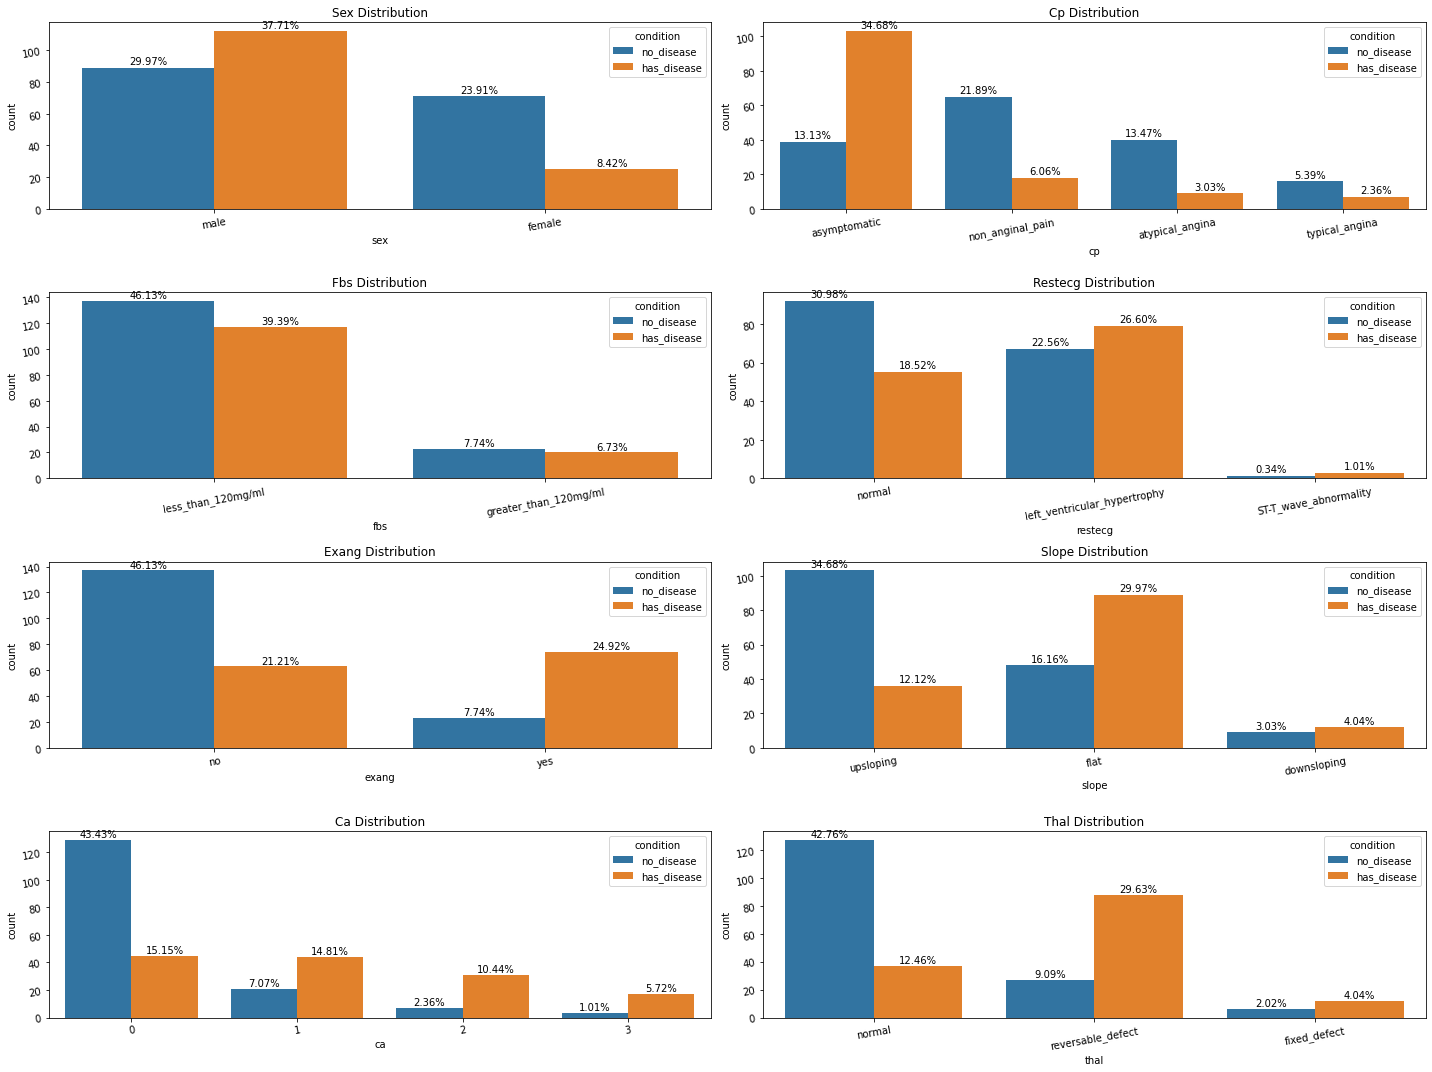

In [27]:
ctg_dist1(train, categorical_columns, 4, 2)

Видим, что:

*   мужчины болеют чаще женщин
*   асимптоматический тип боли грудной клетки - один из явных признаков болезни сердца
*   плоский наклон пикового сегмента ST при нагрузке сигнализирует о возможной болезни
*   люди с крупными сосудами, окрашенными при флюороскопии, болеют чаще
*   люди с талассемией болеют чаще
*   люди со стенокардией при физической нагрузке болеют чаще



